# Probabilistic learning

A strong tool in machine learning and engineering is the probabilistic approach to solve problems. Particularly successful approach has been the *bayesian approach* in machine learning. It is not a single method but it is a way of thinking!

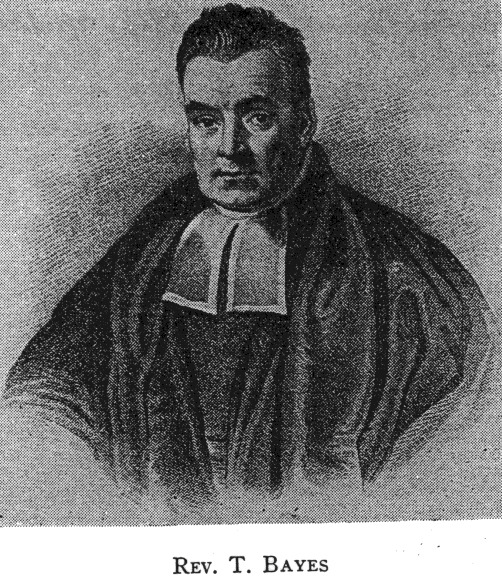

## Probabilities

From high school you might remember the probability as a single frequentist measure of tossing a coin or dice:

\begin{equation}
 P(A) .
\end{equation}

However, in machine learning we mainly use the conditional probability,

\begin{equation}
  P(A | B) \enspace ,
\end{equation}

that is the probability of $A$ when $B$ is known. To use the same variable names as before where $y$ is the desired target value and $x$ is input, the conditional probability takes the form

\begin{equation}
  P(y | x) \enspace .
  \label{eq:cond_prob}
\end{equation}

## Bayes theorem

Bayes theorem defines *a posteriori* probability for the event $A$ when $B$ is known as a special form of the conditional probability,

\begin{equation}\label{eq:bayes}
    P(A|B) = \frac{P(B|A) P(A)}{P(B)} \enspace,
\end{equation}
 
where

- $P(A)$ = *a priori* probability of event $A$
- $P(B)$ = a priori probability of event $B$
- $P(A|B)$ = conditional probability for $A$ when $B$ is known
- $P(B|A)$ = conditional probability for $B$ when $A$ is known


### Estimation of a posteriori probability

Why $P(B|A)$ is easier than $P(A|B)$? Let's study the case A=hobbit and B=height, i.e. why $P(height|hobbit)$ is easier to estimate than $P(hobbit|height)$.

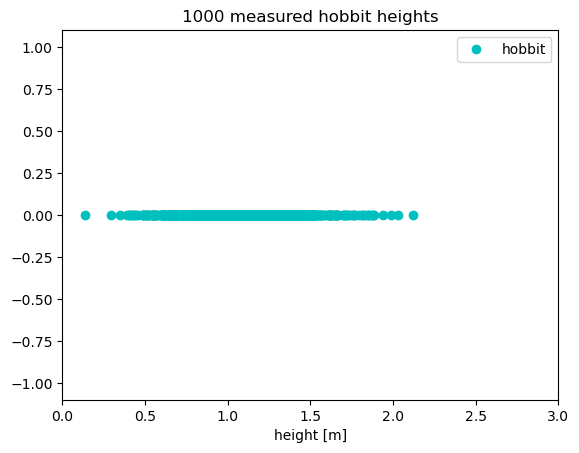

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#
# Let's generate some random data that mimics our artificial example
np.random.seed(13) # to always get the same points
N_h = 1000
N_e = 200
x_h = np.random.normal(1.1,0.3,N_h)
x_e = np.random.normal(1.9,0.4,N_e)
plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobbit")
plt.title(f'{N_h} measured hobbit heights')
plt.legend()
plt.xlabel('height [m]')
plt.axis([0.0,3.0,-1.1,+1.1])
plt.show()

Measured values can be converted to a histogram that tells how many samples in each "bin".

[ 19. 360. 541.  78.   2.]
[0.  0.5 1.  1.5 2.  2.5]


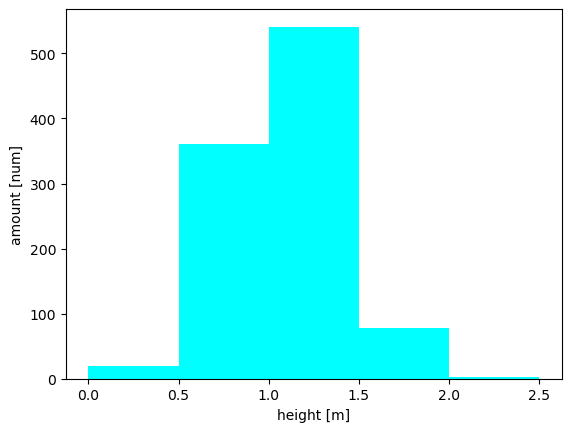

In [2]:
# Histogram of 5 bins
foo = plt.hist(x_h, bins = 5, range = [0,2.5], color='cyan')
x_h_hist = foo[0]
x_h_hist_bins = foo[1]
print(x_h_hist)
print(x_h_hist_bins)
plt.xlabel('height [m]')
plt.ylabel('amount [num]')
plt.show()

A histogram can be converted to a probability value (proportion) by dividing each bin value by the total number of samples.

[0.019 0.36  0.541 0.078 0.002]
[0.  0.5 1.  1.5 2.  2.5]


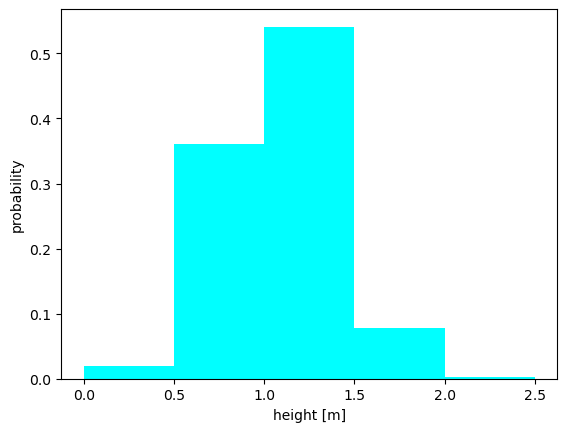

In [3]:
foo = plt.hist(x_h_hist_bins[:-1], x_h_hist_bins, weights=x_h_hist/1000, color='cyan')
x_h_hist = foo[0]
x_h_hist_bins = foo[1]
print(x_h_hist)
print(x_h_hist_bins)
plt.xlabel('height [m]')
plt.ylabel('probability')
plt.show()

### Probability density function (pdf)
The above representation should be considered as an interval probability, for example, hobbit height being in $[1.0,1.5]$ meters is $0.541$ i.e. 54.1% of the measured hobits were in that height interval. This is a discrete probability distribution.

However, continuous probability distributions called as *probability density functions* (pdfs) have a value at every point. For discrete distributions we don't need pdfs but we can form them for the sake of example.

The similarity between the continuous and discrete is that the probability integral becomes sum:

\begin{equation}
\int p(x|hobbit) dx = \sum_i p(\Delta_i | hobbit) \cdot |\Delta_i| = 1.0
\end{equation}

To do that, we need to divide bin by its width and that give the pdf at the center of each bin.

**IMPORTANT** note that the pdf values can be anything and you should never interpret them as probabilities. You can ask what is the probability of the hobbit height being between 1.0m and 1.5m, but you cannot ask what is the probability of a hobbit being exactly  1.21 meters tall. For example, likelihood or the numerator of Bayes rule is a density value, not probability.

#### Demo: convert discrete distribution toward semi-continuous pdf

[0.038 0.72  1.082 0.156 0.004]
[0.  0.5 1.  1.5 2.  2.5]


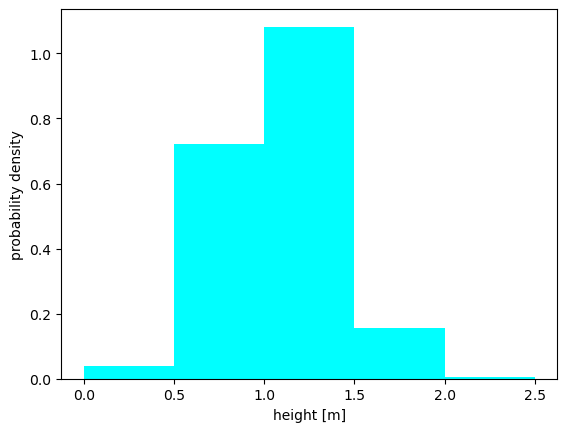

[0.004 0.072 0.416 1.024 1.284 0.88  0.248 0.064 0.008 0.   ]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5 ]


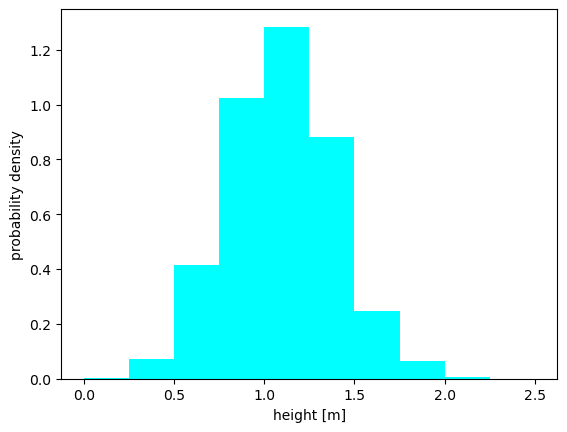

[0.    0.008 0.016 0.128 0.32  0.512 0.88  1.168 1.288 1.28  1.096 0.664
 0.344 0.152 0.096 0.032 0.016 0.    0.    0.   ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.125 1.25  1.375
 1.5   1.625 1.75  1.875 2.    2.125 2.25  2.375 2.5  ]


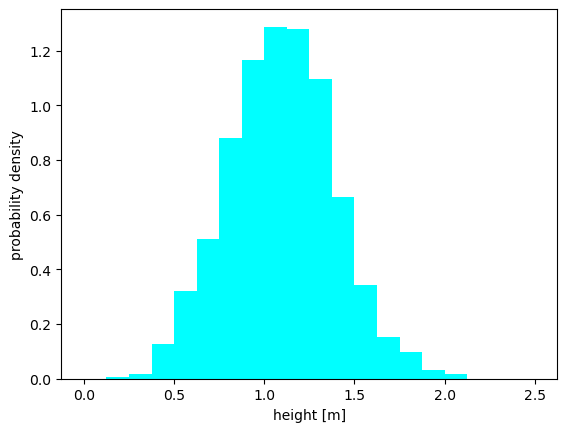

[0.    0.    0.016 0.    0.016 0.016 0.112 0.144 0.304 0.336 0.512 0.512
 0.736 1.024 1.12  1.216 1.376 1.2   1.2   1.36  0.992 1.2   0.736 0.592
 0.432 0.256 0.176 0.128 0.096 0.096 0.032 0.032 0.016 0.016 0.    0.
 0.    0.    0.    0.   ]
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
 1.875  1.9375 2.     2.0625 2.125  2.1875 2.25   2.3125 2.375  2.4375
 2.5   ]


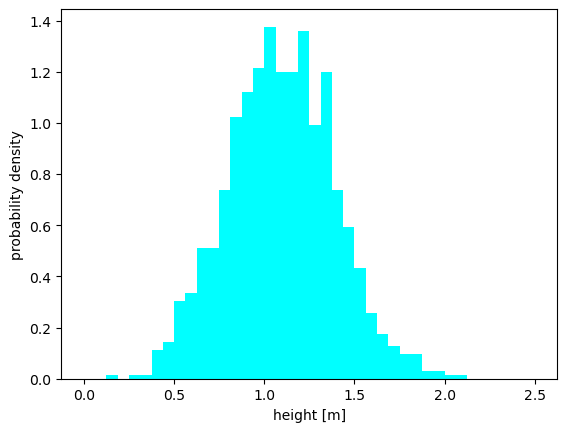

[0.    0.    0.    0.    0.032 0.    0.    0.    0.    0.032 0.    0.032
 0.096 0.128 0.096 0.192 0.224 0.384 0.16  0.512 0.48  0.544 0.48  0.544
 0.8   0.672 0.864 1.184 1.152 1.088 1.216 1.216 1.312 1.44  1.216 1.184
 1.152 1.248 1.376 1.344 1.184 0.8   1.344 1.056 0.864 0.608 0.704 0.48
 0.608 0.256 0.224 0.288 0.256 0.096 0.16  0.096 0.128 0.064 0.064 0.128
 0.064 0.    0.032 0.032 0.032 0.    0.    0.032 0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.      1.03125 1.0625  1.09375
 1.125   1.15625 1.1875  1.21875 1.25    1.28125 1.3125  1.34375 1.375
 1.40625 1.4375  1.46875 1.5     1.53125 1.5625  1.59375 1.625   1.65625
 1.6875  1.71875 1.75    1.78125 1.8125  1.84375 1.875   1.90625 1.9375
 1.96875 2. 

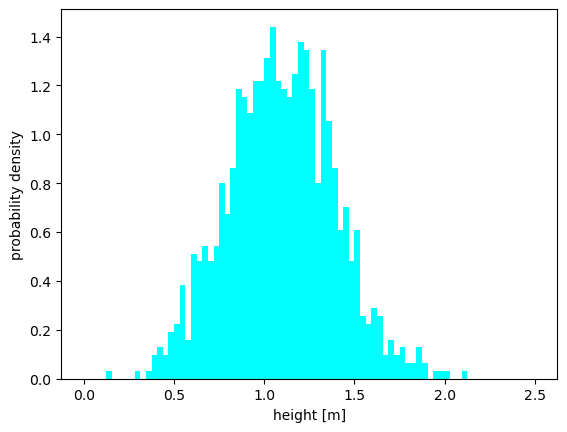

In [4]:
for num_of_bins in [5, 10, 20, 40, 80]:
    foo = plt.hist(x_h, bins = num_of_bins, range = [0,2.5], density=True, color='cyan')
    x_h_hist = foo[0]
    x_h_hist_bins = foo[1]
    print(x_h_hist)
    print(x_h_hist_bins)
    plt.xlabel('height [m]')
    plt.ylabel('probability density')
    plt.show()

In [6]:
# Let's make sure the pdf represents probability by integrating it from -infty to +infty
# (summing in the discrete domain)
bin_width = x_h_hist_bins[1]-x_h_hist_bins[0]
print(bin_width)
print(f'The pdf integrates (sums) to {sum(bin_width*x_h_hist)}')

0.03125
The pdf integrates (sums) to 1.0000000000000004


## Bayes optimal decision

*Maximum a posteriori* (MAP) decision/hypothesis, $h_{MAP}$, and *maximum likelihood* (ML) decision/hypothesis, $h_{ML}$.

**Example 4.2 Does patient have cancer or not?**

A patient takes a lab test and the result comes back positive.  The test
returns a correct positive result in only $98\%$ of the cases in which the
disease is actually present, and a correct negative result in only $97\%$ of
the cases in which the disease is not present.  Furthermore, $.008$ of the
entire population have this cancer.

\begin{eqnarray}
& P(cancer) = \ \ \ \ \ \ \ \ \ \  & P(\neg cancer) =  \ \ \ \ \ \ \ \ \ \ \nonumber \\
& P(+ | cancer) =  \ \ \ \ \ \ \ \ \ \   & P(- | cancer) =   \ \ \ \ \ \ \ \ \ \ \nonumber \\
& P(+ | \neg cancer) =   \ \ \ \ \ \ \ \ \ \  & P(- | \neg cancer) =  \ \ \ \ \ \ \ \ \ \ \nonumber 
\end{eqnarray}

$h_{MAP}$?

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 1-2.